In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
arabi_genes = pd.read_csv('/data/passala/Module_paper_data/Medicago_vs_potato_salt_upper_tissue/medicago_gene_results.csv', index_col= 0)
arabi_ortho = pd.read_csv('/data/passala/Module_paper_data/Medicago_vs_potato_salt_upper_tissue/medicago_ortho_trimmed_out_2_gene_families.csv', index_col= 0)
tomato_genes = pd.read_csv('/data/passala/Module_paper_data/Medicago_vs_potato_salt_upper_tissue/potato_gene_results.csv', index_col= 0)
tomato_ortho = pd.read_csv('/data/passala/Module_paper_data/Medicago_vs_potato_salt_upper_tissue/potato_ortho_trimmed_out_2_gene_families.csv', index_col= 0)

In [4]:
log_fc_change_evaluation_value = 1.5
log_fc_change_evaluation_value_negative = -1*log_fc_change_evaluation_value

In [5]:
tomato_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
10772at3193,3857.377618,0.888131,0.145522,6.103055,1.040602e-09,8.850650e-09
10950at3193,2367.060410,-0.194772,0.133739,-1.456353,1.452952e-01,2.006278e-01
109808at3193,122.181521,-3.637943,0.590380,-6.162040,7.181382e-10,6.297822e-09
109841at3193,1243.775892,-0.518712,0.119204,-4.351460,1.352337e-05,5.091965e-05
109843at3193,1738.062351,-0.448636,0.190996,-2.348924,1.882776e-02,3.367515e-02
...,...,...,...,...,...,...
9601at3193,1161.663834,-0.552685,0.146420,-3.774654,1.602301e-04,4.753394e-04
9609at3193,181.484672,0.005716,0.214376,0.026661,9.787300e-01,9.826220e-01
9789at3193,1315.529592,0.987404,0.156275,6.318359,2.643549e-10,2.467141e-09
9877at3193,6385.884074,1.840567,0.221504,8.309407,9.618151e-17,2.078300e-15


In [6]:
trimmed_tomato_ortho = tomato_ortho.loc[tomato_ortho.index.isin(arabi_ortho.index)]
trimmed_arabi_ortho = arabi_ortho.loc[arabi_ortho.index.isin(trimmed_tomato_ortho.index)]


In [7]:
trimmed_arabi_ortho_named = trimmed_arabi_ortho.rename(columns = {'log2FoldChange':'Arabidopsis Log2FC'})
trimmed_tomato_ortho_named = trimmed_tomato_ortho.rename(columns = {'log2FoldChange':'Tomato Log2FC'})



In [8]:
merged_ortho_df = trimmed_arabi_ortho_named[['Arabidopsis Log2FC']].merge(right = trimmed_tomato_ortho_named, left_index= True, right_index = True)

In [9]:
merged_ortho_df

,Arabidopsis Log2FC,baseMean,Tomato Log2FC,lfcSE,stat,pvalue,padj
10772at3193,-0.603083,3857.377618,0.888131,0.145522,6.103055,1.040602e-09,8.850650e-09
10950at3193,1.659283,2367.060410,-0.194772,0.133739,-1.456353,1.452952e-01,2.006278e-01
109841at3193,0.178142,1243.775892,-0.518712,0.119204,-4.351460,1.352337e-05,5.091965e-05
109843at3193,-0.727901,1738.062351,-0.448636,0.190996,-2.348924,1.882776e-02,3.367515e-02
109859at3193,-0.362878,200.929249,2.880992,0.303512,9.492194,2.262227e-21,7.588742e-20
...,...,...,...,...,...,...,...
9601at3193,0.368683,1161.663834,-0.552685,0.146420,-3.774654,1.602301e-04,4.753394e-04
9609at3193,-1.692337,181.484672,0.005716,0.214376,0.026661,9.787300e-01,9.826220e-01
9789at3193,0.142135,1315.529592,0.987404,0.156275,6.318359,2.643549e-10,2.467141e-09
9877at3193,1.132814,6385.884074,1.840567,0.221504,8.309407,9.618151e-17,2.078300e-15


In [10]:
log_fc_change_evaluation_value

1.5

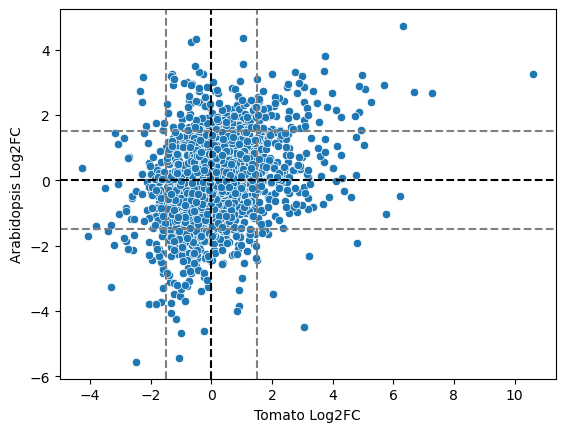

In [11]:
sns.scatterplot(data = merged_ortho_df, x ='Tomato Log2FC', y = 'Arabidopsis Log2FC' )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(x =log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(y =log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(x =log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(y =log_fc_change_evaluation_value_negative, color="grey", linestyle="--")

Text(0, 0.5, 'Orthogroup-wise log2-fold change in \n medicago salt stress')

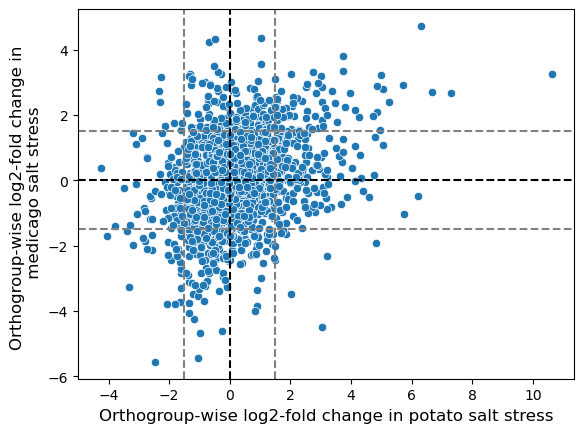

In [43]:
sns.scatterplot(x =trimmed_tomato_ortho['log2FoldChange'], y = trimmed_arabi_ortho['log2FoldChange'], )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.xlabel("Orthogroup-wise log2-fold change in potato salt stress", fontsize = 12)
plt.ylabel("Orthogroup-wise log2-fold change in \n medicago salt stress", fontsize = 12)

In [13]:
trimmed_arabi_ortho

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
10772at3193,1920.494208,-0.603083,0.175218,-3.441905,5.776329e-04,2.488087e-03
10950at3193,906.680064,1.659283,0.251089,6.608339,3.886565e-11,4.091320e-09
109841at3193,106.107434,0.178142,0.244091,0.729817,4.655019e-01,5.818437e-01
109843at3193,2020.614100,-0.727901,0.183143,-3.974488,7.053088e-05,4.483229e-04
109859at3193,44.168932,-0.362878,0.516717,-0.702277,4.825067e-01,5.966244e-01
...,...,...,...,...,...,...
9601at3193,313.615229,0.368683,0.220084,1.675191,9.389678e-02,1.646723e-01
9609at3193,65.810657,-1.692337,0.566475,-2.987484,2.812839e-03,9.288610e-03
9789at3193,1330.229507,0.142135,0.192551,0.738166,4.604135e-01,5.774826e-01
9877at3193,959.082742,1.132814,0.179786,6.300919,2.958865e-10,2.059752e-08


In [14]:
all(trimmed_arabi_ortho.index == trimmed_tomato_ortho.index)

True

In [46]:
merged_result = pd.DataFrame(data = zip(trimmed_tomato_ortho['log2FoldChange'], trimmed_arabi_ortho['log2FoldChange']), columns = ['Tomato','Arabi'])

all_over_1 = merged_result.loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']>log_fc_change_evaluation_value)]
all_under_1 = merged_result.loc[(merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (merged_result['Arabi']<log_fc_change_evaluation_value_negative)]
discord_bottom = merged_result.loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']<log_fc_change_evaluation_value_negative)]
discord_top = merged_result.loc[(merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (merged_result['Arabi']>log_fc_change_evaluation_value)]

In [47]:
merged_result['Classification'] = 'Non-substantial'
merged_result['Classification'].loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']>log_fc_change_evaluation_value)] = 'Substantial'
merged_result['Classification'].loc[(merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (merged_result['Arabi']<log_fc_change_evaluation_value_negative)]= 'Substantial'
merged_result['Classification'].loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']<log_fc_change_evaluation_value_negative)]= 'Substantial'
merged_result['Classification'].loc[(merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (merged_result['Arabi']>log_fc_change_evaluation_value)]= 'Substantial'

/tmp/ipykernel_1702682/2994845458.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  merged_result['Classification'].loc[(merged_result['Tomato']>log_fc_change_evaluation_value) & (merged_result['Arabi']>log_fc_change_evaluation_value)] = '

Text(0, 0.5, 'Orthogroup-wise log2-fold change in \n Medicago Salt Stress')

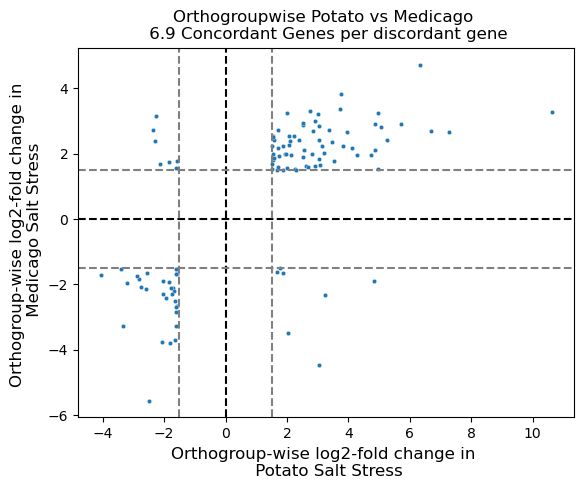

In [48]:
sns.scatterplot(data = merged_result.loc[merged_result['Classification'] == "Substantial"] , x ='Tomato', y = 'Arabi', s = 10)
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.title('Orthogroupwise Potato vs Medicago \n 6.9 Concordant Genes per discordant gene')
plt.xlabel("Orthogroup-wise log2-fold change in \n Potato Salt Stress", fontsize = 12)
plt.ylabel("Orthogroup-wise log2-fold change in \n Medicago Salt Stress", fontsize = 12)

In [18]:
discord_ratio = (len(all_over_1)+len(all_under_1))/(len(discord_bottom)+len(discord_top))
discord_ratio

6.928571428571429

In [19]:
discord_bottom

,Tomato,Arabi
368,4.817739,-1.900369
419,1.863758,-1.646096
561,3.222223,-2.313676
705,1.762033,-1.511019
1484,2.023270,-3.481683
1948,3.052657,-4.480210
2107,1.672973,-1.617888


In [20]:
discord_top

,Tomato,Arabi
635,-1.832226,1.753394
683,-2.351308,2.729299
1050,-2.270780,3.165058
1319,-2.143350,1.676779
1861,-1.600198,1.552492
2092,-2.303383,2.389709
2113,-1.572518,1.765264


In [21]:
merged_result = pd.DataFrame(data = zip(trimmed_tomato_ortho['log2FoldChange'], trimmed_arabi_ortho['log2FoldChange']), columns = ['Tomato','Arabi'])
pos_thresh = 1
neg_thresh = 1
tomato_any_change = merged_result.loc[(merged_result['Tomato']>pos_thresh)|(merged_result['Tomato']<neg_thresh)]
tomato_concordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']>pos_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']<neg_thresh))]
tomato_disconcordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']<neg_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']>pos_thresh))]
percent_concordant_tomato = len(tomato_concordant_change)/len(tomato_any_change)
percent_non_discord_tomato = len(tomato_concordant_change)/(len(tomato_concordant_change+tomato_disconcordant_change))
print(percent_concordant_tomato)
print(percent_non_discord_tomato)


arabi_any_change = merged_result.loc[(merged_result['Arabi']>pos_thresh)|(merged_result['Arabi']<neg_thresh)]
arabi_concordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']>pos_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']<neg_thresh))]
arabi_disconcordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']<neg_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']>pos_thresh))]

percent_concordant_arabi = len(arabi_concordant_change)/len(arabi_any_change)
percent_non_discord_arabi = len(arabi_concordant_change)/(len(arabi_concordant_change+arabi_disconcordant_change))

print(percent_concordant_arabi)
print(percent_non_discord_arabi)

0.7957697642163661
0.7957697642163661
0.7957697642163661
0.7957697642163661


In [22]:
arabi_disconcordant_change

,Tomato,Arabi
1,-0.194772,1.659283
4,2.880992,-0.362878
15,1.226154,0.015534
25,-0.446323,1.683680
26,-1.294601,1.018913
...,...,...
2845,1.069376,-0.824767
2866,1.177426,-0.673866
2868,1.151447,0.670339
2871,-0.659074,2.922179


In [23]:
tomato_any_change

,Tomato,Arabi
0,0.888131,-0.603083
1,-0.194772,1.659283
2,-0.518712,0.178142
3,-0.448636,-0.727901
4,2.880992,-0.362878
...,...,...
2879,-0.552685,0.368683
2880,0.005716,-1.692337
2881,0.987404,0.142135
2882,1.840567,1.132814


In [24]:
tomato_concordant_change

,Tomato,Arabi
0,0.888131,-0.603083
2,-0.518712,0.178142
3,-0.448636,-0.727901
5,0.401843,0.080555
6,-0.649941,-0.197768
...,...,...
2879,-0.552685,0.368683
2880,0.005716,-1.692337
2881,0.987404,0.142135
2882,1.840567,1.132814


In [25]:
arabidopsis_tomato_nm = pd.read_csv('/data/passala/OrthoDB_data/V_11_pairwise_maps_fixed_problem_species/medicago_to_potato_ortholog_NM.csv')

In [26]:
arabidopsis_tomato_nm

,medicago OrthoGene,potato OrthoGene,Orthogroup,medicago Symbol,potato Symbol
0,3880_0:00298d,4113_0:000e6a,10009at3193,LOC11432144,LOC102579819
1,3880_0:00042c,4113_0:0038a0,10092at3193,LOC11432413,LOC102577539
2,3880_0:0050c6,4113_0:0057e8,10147at3193,LOC11439919,LOC102600647
3,3880_0:007458,4113_0:0057e8,10147at3193,LOC25502581,LOC102600647
4,3880_0:006fc8,4113_0:000cd2,10228at3193,LOC25502274,LOC102599875
...,...,...,...,...,...
77969,3880_0:0073aa,4113_0:00186e,9942at3193,LOC11422618,LOC102586912
77970,3880_0:00388f,4113_0:002ed0,9942at3193,LOC11426138,LOC102591805
77971,3880_0:0073aa,4113_0:002ed0,9942at3193,LOC11422618,LOC102591805
77972,3880_0:00388f,4113_0:00313c,9942at3193,LOC11426138,LOC102592586


In [27]:
arabidopsis_tomato_nm = arabidopsis_tomato_nm.drop_duplicates(subset = 'medicago Symbol',)
arabidopsis_tomato_nm = arabidopsis_tomato_nm.drop_duplicates(subset = 'potato Symbol',)
arabidopsis_tomato_nm

,medicago OrthoGene,potato OrthoGene,Orthogroup,medicago Symbol,potato Symbol
0,3880_0:00298d,4113_0:000e6a,10009at3193,LOC11432144,LOC102579819
1,3880_0:00042c,4113_0:0038a0,10092at3193,LOC11432413,LOC102577539
2,3880_0:0050c6,4113_0:0057e8,10147at3193,LOC11439919,LOC102600647
4,3880_0:006fc8,4113_0:000cd2,10228at3193,LOC25502274,LOC102599875
5,3880_0:003883,4113_0:002755,10488at3193,LOC11445193,LOC102599922
...,...,...,...,...,...
77961,3880_0:002d26,4113_0:006c24,9828at3193,LOC25488891,LOC102591791
77962,3880_0:002354,4113_0:005f0f,9836at3193,LOC11432476,LOC102600007
77963,3880_0:002d72,4113_0:0026d9,9877at3193,LOC11445289,LOC102594559
77967,3880_0:00602c,4113_0:000d12,9919at3193,LOC11431644,LOC102587545


In [28]:
arabi_genes_trimmed = arabi_genes.merge(how = 'inner', left_index= True, right = arabidopsis_tomato_nm[['potato Symbol','medicago Symbol']], right_on= 'medicago Symbol')
arabi_genes_trimmed = arabi_genes_trimmed.drop_duplicates(subset = 'medicago Symbol', keep = False)
arabi_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,potato Symbol,medicago Symbol
71148,403.866867,0.011067,0.505759,0.021882,0.982542,0.988719,LOC102601062,LOC11423147
7009,127.467076,-0.375968,0.299814,-1.254001,0.209842,0.322634,LOC102591614,LOC11434621
33129,32.361682,1.724550,0.973774,1.770996,0.076561,0.146922,LOC102591284,LOC25481846
30798,126.946158,-0.922333,0.393398,-2.344526,0.019051,0.048611,LOC102577517,LOC11420842
31838,149.052981,-0.267933,0.252054,-1.062999,0.287782,0.410345,LOC102599657,LOC11425644
...,...,...,...,...,...,...,...,...
19338,1539.071118,-0.141245,0.262463,-0.538153,0.590471,0.697968,LOC102600813,LOC25480527
67769,713.069029,-0.949012,0.398570,-2.381041,0.017264,0.044944,LOC102596427,LOC25494380
56318,212.593930,-0.621380,0.375026,-1.656897,0.097540,0.177438,LOC102582522,LOC25494378
19306,331.760454,0.220814,0.368470,0.599272,0.548991,0.661764,LOC102591173,LOC11409691


In [29]:
arabidopsis_tomato_nm

,medicago OrthoGene,potato OrthoGene,Orthogroup,medicago Symbol,potato Symbol
0,3880_0:00298d,4113_0:000e6a,10009at3193,LOC11432144,LOC102579819
1,3880_0:00042c,4113_0:0038a0,10092at3193,LOC11432413,LOC102577539
2,3880_0:0050c6,4113_0:0057e8,10147at3193,LOC11439919,LOC102600647
4,3880_0:006fc8,4113_0:000cd2,10228at3193,LOC25502274,LOC102599875
5,3880_0:003883,4113_0:002755,10488at3193,LOC11445193,LOC102599922
...,...,...,...,...,...
77961,3880_0:002d26,4113_0:006c24,9828at3193,LOC25488891,LOC102591791
77962,3880_0:002354,4113_0:005f0f,9836at3193,LOC11432476,LOC102600007
77963,3880_0:002d72,4113_0:0026d9,9877at3193,LOC11445289,LOC102594559
77967,3880_0:00602c,4113_0:000d12,9919at3193,LOC11431644,LOC102587545


In [30]:
tomato_genes.head(50)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
LOC102578245,824.044875,2.065767,0.533430,3.872610,1.076760e-04,3.836325e-04
LOC102578572,396.063317,-1.916998,0.377812,-5.073953,3.896349e-07,2.500866e-06
LOC102579565,589.779005,-0.322138,0.151210,-2.130405,3.313818e-02,5.865811e-02
LOC102598415,746.107899,-0.331639,0.151165,-2.193886,2.824363e-02,5.115895e-02
LOC107060860,66.215139,-1.104732,0.344245,-3.209144,1.331308e-03,3.549327e-03
LOC102580539,375.306915,-0.366950,0.206399,-1.777866,7.542589e-02,1.194248e-01
LOC102580217,1456.350493,-0.591960,0.172677,-3.428141,6.077301e-04,1.772154e-03
LOC107060889,50.143497,0.444303,0.457847,0.970417,3.318387e-01,4.156507e-01
LOC102581788,718.197728,-0.634535,0.307534,-2.063298,3.908430e-02,6.775265e-02
LOC102601751,26.962691,-1.047351,0.623963,-1.678548,9.324025e-02,1.430093e-01


In [31]:
tomato_genes_trimmed = tomato_genes.merge(how = 'inner', left_index= True, right = arabidopsis_tomato_nm[['potato Symbol','medicago Symbol']], right_on= 'potato Symbol')
#tomato_genes_trimmed = tomato_genes_trimmed.drop_duplicates(subset = 'medicago Symbol', keep = False)
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,potato Symbol,medicago Symbol
30648,824.044875,2.065767,0.533430,3.872610,1.076760e-04,3.836325e-04,LOC102578245,LOC25483600
2988,396.063317,-1.916998,0.377812,-5.073953,3.896349e-07,2.500866e-06,LOC102578572,LOC11428583
7773,589.779005,-0.322138,0.151210,-2.130405,3.313818e-02,5.865811e-02,LOC102579565,LOC11439120
15873,746.107899,-0.331639,0.151165,-2.193886,2.824363e-02,5.115895e-02,LOC102598415,LOC11420567
58562,375.306915,-0.366950,0.206399,-1.777866,7.542589e-02,1.194248e-01,LOC102580539,LOC11422949
...,...,...,...,...,...,...,...,...
34846,252.577332,-0.699603,0.286324,-2.443399,1.454963e-02,2.881223e-02,LOC102582747,LOC25485633
12186,956.586129,0.389569,0.177681,2.192517,2.834217e-02,5.127252e-02,LOC102593803,LOC11445212
27593,125.240049,0.388335,0.307803,1.261634,2.070805e-01,2.797445e-01,LOC102599056,LOC11424039
60542,791.555382,-0.057501,0.167994,-0.342277,7.321424e-01,7.872053e-01,LOC102593479,LOC11406605


In [32]:
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,potato Symbol,medicago Symbol
30648,824.044875,2.065767,0.533430,3.872610,1.076760e-04,3.836325e-04,LOC102578245,LOC25483600
2988,396.063317,-1.916998,0.377812,-5.073953,3.896349e-07,2.500866e-06,LOC102578572,LOC11428583
7773,589.779005,-0.322138,0.151210,-2.130405,3.313818e-02,5.865811e-02,LOC102579565,LOC11439120
15873,746.107899,-0.331639,0.151165,-2.193886,2.824363e-02,5.115895e-02,LOC102598415,LOC11420567
58562,375.306915,-0.366950,0.206399,-1.777866,7.542589e-02,1.194248e-01,LOC102580539,LOC11422949
...,...,...,...,...,...,...,...,...
34846,252.577332,-0.699603,0.286324,-2.443399,1.454963e-02,2.881223e-02,LOC102582747,LOC25485633
12186,956.586129,0.389569,0.177681,2.192517,2.834217e-02,5.127252e-02,LOC102593803,LOC11445212
27593,125.240049,0.388335,0.307803,1.261634,2.070805e-01,2.797445e-01,LOC102599056,LOC11424039
60542,791.555382,-0.057501,0.167994,-0.342277,7.321424e-01,7.872053e-01,LOC102593479,LOC11406605


In [33]:
arabi_genes_trimmed = arabi_genes_trimmed.loc[arabi_genes_trimmed['medicago Symbol'].isin(tomato_genes_trimmed['medicago Symbol'])]
tomato_genes_trimmed = tomato_genes_trimmed.loc[tomato_genes_trimmed['potato Symbol'].isin(arabi_genes_trimmed['potato Symbol'])]


In [34]:
tomato_genes_trimmed

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,potato Symbol,medicago Symbol
30648,824.044875,2.065767,0.533430,3.872610,1.076760e-04,3.836325e-04,LOC102578245,LOC25483600
2988,396.063317,-1.916998,0.377812,-5.073953,3.896349e-07,2.500866e-06,LOC102578572,LOC11428583
7773,589.779005,-0.322138,0.151210,-2.130405,3.313818e-02,5.865811e-02,LOC102579565,LOC11439120
15873,746.107899,-0.331639,0.151165,-2.193886,2.824363e-02,5.115895e-02,LOC102598415,LOC11420567
58562,375.306915,-0.366950,0.206399,-1.777866,7.542589e-02,1.194248e-01,LOC102580539,LOC11422949
...,...,...,...,...,...,...,...,...
24594,494.391923,-0.222835,0.198003,-1.125411,2.604150e-01,3.395459e-01,LOC102579213,LOC11428339
69869,3037.533973,0.486411,0.215223,2.260033,2.381923e-02,4.398012e-02,LOC102582399,LOC25485634
12186,956.586129,0.389569,0.177681,2.192517,2.834217e-02,5.127252e-02,LOC102593803,LOC11445212
60542,791.555382,-0.057501,0.167994,-0.342277,7.321424e-01,7.872053e-01,LOC102593479,LOC11406605


In [35]:
tomato_genes_trimmed = (tomato_genes_trimmed.set_index('medicago Symbol')
          .reindex(arabi_genes_trimmed.set_index('medicago Symbol').index)
          .reset_index()
       )

In [36]:
tomato_genes_trimmed

,medicago Symbol,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,potato Symbol
0,LOC11423147,357.005137,-0.107202,0.231537,-0.462998,6.433654e-01,7.109155e-01,LOC102601062
1,LOC11434621,1123.133258,0.534209,0.205210,2.603229,9.235019e-03,1.939462e-02,LOC102591614
2,LOC25481846,927.476551,-0.242976,0.152954,-1.588564,1.121589e-01,1.670704e-01,LOC102591284
3,LOC11420842,142.970741,-1.101707,0.380751,-2.893507,3.809655e-03,8.925798e-03,LOC102577517
4,LOC11425644,463.920344,0.102309,0.198489,0.515439,6.062466e-01,6.786002e-01,LOC102599657
...,...,...,...,...,...,...,...,...
8038,LOC25480527,656.394063,1.302941,0.212768,6.123772,9.138593e-10,9.636253e-09,LOC102600813
8039,LOC25494380,427.966422,-0.262303,0.248904,-1.053832,2.919598e-01,3.736159e-01,LOC102596427
8040,LOC25494378,1336.037173,-0.369941,0.209588,-1.765089,7.754878e-02,1.222924e-01,LOC102582522
8041,LOC11409691,2163.871694,-0.387919,0.288595,-1.344165,1.788949e-01,2.471611e-01,LOC102591173


In [37]:
arabi_genes_trimmed = arabi_genes_trimmed.reset_index()

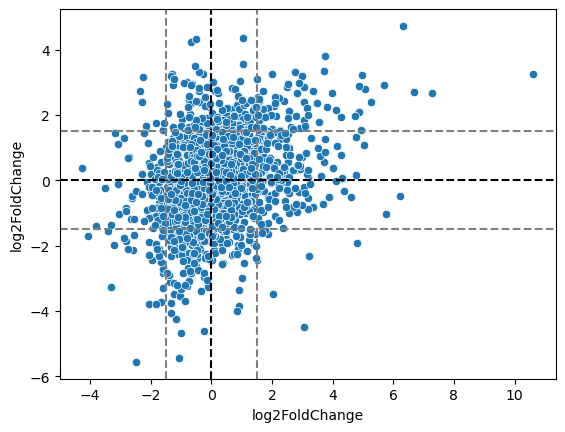

In [38]:
sns.scatterplot(x =trimmed_tomato_ortho['log2FoldChange'], y = trimmed_arabi_ortho['log2FoldChange'], )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")

Text(0, 0.5, 'Genewise log2-fold change in \n medicago salt stress')

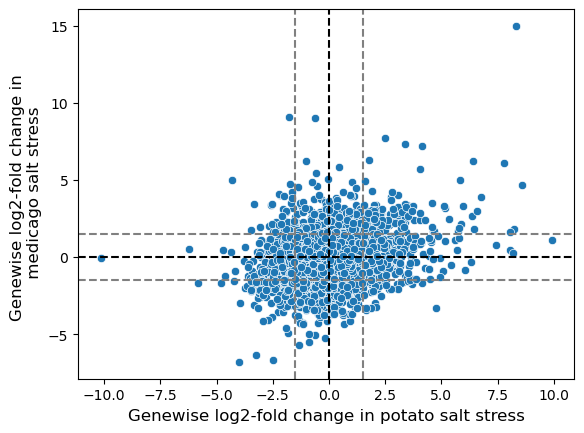

In [49]:
sns.scatterplot(x =tomato_genes_trimmed['log2FoldChange'], y = arabi_genes_trimmed['log2FoldChange'])
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.xlabel("Genewise log2-fold change in potato salt stress", fontsize = 12)
plt.ylabel("Genewise log2-fold change in \n medicago salt stress", fontsize = 12)

In [40]:
new_merged_result = pd.DataFrame(data = zip(tomato_genes_trimmed['log2FoldChange'], arabi_genes_trimmed['log2FoldChange']), columns = ['Tomato','Arabi'])

all_over_1 = new_merged_result.loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']>log_fc_change_evaluation_value)]
all_under_1 = new_merged_result.loc[(new_merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (new_merged_result['Arabi']<log_fc_change_evaluation_value_negative)]
discord_bottom = new_merged_result.loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']<log_fc_change_evaluation_value_negative)]
discord_top = new_merged_result.loc[(new_merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (new_merged_result['Arabi']>log_fc_change_evaluation_value)]

In [41]:
new_merged_result['Classification'] = 'Non-substantial'
new_merged_result['Classification'].loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']>log_fc_change_evaluation_value)] = 'Substantial'
new_merged_result['Classification'].loc[(new_merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (new_merged_result['Arabi']<log_fc_change_evaluation_value_negative)]= 'Substantial'
new_merged_result['Classification'].loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']<log_fc_change_evaluation_value_negative)]= 'Substantial'
new_merged_result['Classification'].loc[(new_merged_result['Tomato']<log_fc_change_evaluation_value_negative) & (new_merged_result['Arabi']>log_fc_change_evaluation_value)]= 'Substantial'

/tmp/ipykernel_1702682/1856289886.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  new_merged_result['Classification'].loc[(new_merged_result['Tomato']>log_fc_change_evaluation_value) & (new_merged_result['Arabi']>log_fc_change_evaluation

Text(0, 0.5, 'Genewise log2-fold change in Medicago salt stress')

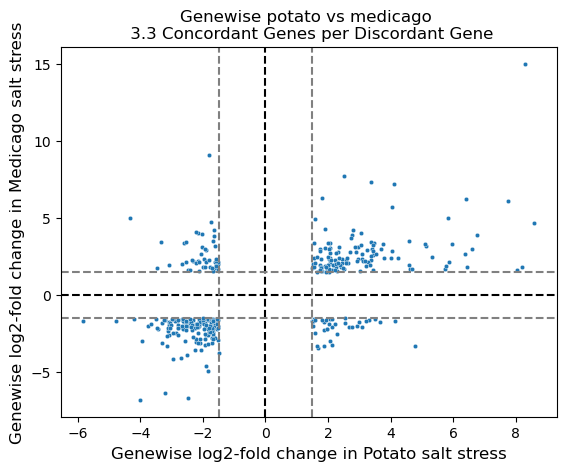

In [42]:
sns.scatterplot(data = new_merged_result.loc[new_merged_result['Classification'] == "Substantial"] , x ='Tomato', y = 'Arabi', s = 10 )
plt.axvline(0, color="k", linestyle="--")
plt.axhline(0, color="k", linestyle="--")
plt.axvline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value, color="grey", linestyle="--")
plt.axvline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.axhline(log_fc_change_evaluation_value_negative, color="grey", linestyle="--")
plt.title('Genewise potato vs medicago \n 3.3 Concordant Genes per Discordant Gene')
plt.xlabel("Genewise log2-fold change in Potato salt stress", fontsize = 12)
plt.ylabel("Genewise log2-fold change in Medicago salt stress", fontsize = 12)

In [44]:
discord_ratio = (len(all_over_1)+len(all_under_1))/(len(discord_bottom)+len(discord_top))
discord_ratio

3.2941176470588234

In [ ]:
all_over_1

In [ ]:
all_under_1

In [ ]:
merged_result

In [ ]:
merged_result = pd.DataFrame(data = zip(tomato_genes_trimmed['log2FoldChange'], arabi_genes_trimmed['log2FoldChange']), columns = ['Tomato','Arabi'])

pos_thresh = 0
neg_thresh = 0
tomato_any_change = merged_result.loc[(merged_result['Tomato']>pos_thresh)|(merged_result['Tomato']<neg_thresh)]
tomato_concordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']>pos_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']<neg_thresh))]
tomato_disconcordant_change = merged_result.loc[((merged_result['Tomato']>pos_thresh) & (merged_result['Arabi']<neg_thresh)) | ((merged_result['Tomato']<neg_thresh) & (merged_result['Arabi']>pos_thresh))]
percent_concordant_tomato = len(tomato_concordant_change)/len(tomato_any_change)
percent_non_discord_tomato = len(tomato_concordant_change)/(len(tomato_concordant_change+tomato_disconcordant_change))
print(percent_concordant_tomato)
print(percent_non_discord_tomato)


arabi_any_change = merged_result.loc[(merged_result['Arabi']>pos_thresh)|(merged_result['Arabi']<neg_thresh)]
arabi_concordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']>pos_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']<neg_thresh))]
arabi_disconcordant_change = merged_result.loc[((merged_result['Arabi']>pos_thresh) & (merged_result['Tomato']<neg_thresh)) | ((merged_result['Arabi']<neg_thresh) & (merged_result['Tomato']>pos_thresh))]

percent_concordant_arabi = len(arabi_concordant_change)/len(arabi_any_change)
percent_non_discord_arabi = len(arabi_concordant_change)/(len(arabi_concordant_change+arabi_disconcordant_change))

print(percent_concordant_arabi)
print(percent_non_discord_arabi)

In [ ]:
stats.spearmanr(a=tomato_genes_trimmed['log2FoldChange'], b = arabi_genes_trimmed['log2FoldChange'] )

In [ ]:
down = tomato_genes_trimmed[
    (tomato_genes_trimmed["log2FoldChange"] <= -2) & (tomato_genes_trimmed["padj"] <= 0.001)
]
up = tomato_genes_trimmed[
    (tomato_genes_trimmed["log2FoldChange"] >= 2) & (tomato_genes_trimmed["padj"] <= 0.001)
]
down_arabi = arabi_genes_trimmed[
    (arabi_genes_trimmed["log2FoldChange"] <= -2)
    & (arabi_genes_trimmed["padj"] <= 0.001)
]
up_arabi = arabi_genes_trimmed[
    (arabi_genes_trimmed["log2FoldChange"] >= 2) & (arabi_genes_trimmed["padj"] <= 0.001)
]

In [ ]:
down_arabi_ortho = trimmed_arabi_ortho[
    (trimmed_arabi_ortho["log2FoldChange"] <= -2)
    & (trimmed_arabi_ortho["padj"] <= 0.001)
]
up_arabi_ortho = trimmed_arabi_ortho[
    (trimmed_arabi_ortho["log2FoldChange"] >= 2) & (trimmed_arabi_ortho["padj"] <= 0.001)]

down_ortho = trimmed_tomato_ortho[
    (trimmed_tomato_ortho["log2FoldChange"] <= -2) & (trimmed_tomato_ortho["padj"] <= 0.001)
]
up_ortho = trimmed_tomato_ortho[
    (trimmed_tomato_ortho["log2FoldChange"] >= 2) & (trimmed_tomato_ortho["padj"] <= 0.001)
]

In [ ]:
len(up_arabi_ortho.merge(how = "inner", right_index = True, left_index= True, right = up_ortho))

In [ ]:
up_ortho

In [ ]:
up_arabi_ortho

In [ ]:
up

In [ ]:
up_arabi

In [ ]:
up_arabi.merge(how = "inner", on = 'arabidopsis Symbol', right = up)